In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Cleaned_Online_Cars_Sale_Marketplace.csv')

df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [18]:
df['SellerName'].value_counts().head(5)

SellerName
EchoPark Automotive Greenville                        33
EchoPark Automotive Salt Lake City Delivery Center    31
Autos of Dallas                                       27
Principle Volvo Cars San Antonio                      23
Mungenast St. Louis Honda                             17
Name: count, dtype: int64

In [20]:
high_mileage_cars = df[df['Mileage'] > 100000]
count_high_mileage_cars = high_mileage_cars.shape[0]

print(f'Number of cars with mileage over 100k: {count_high_mileage_cars}')

Number of cars with mileage over 100k: 184


In [22]:
newer_cars = df[df['Year'] > 2020][['Year', 'Make', 'Model', 'Price']]
print(newer_cars)

      Year    Make                       Model   Price
3     2021   Honda             Accord Sport SE   28500
8     2021   Honda   Pilot Touring 8-Passenger   44299
17    2021  Subaru           Crosstrek Premium   25500
21    2021   Acura                  RDX A-Spec   37000
22    2021   Acura                  RDX A-Spec   38000
...    ...     ...                         ...     ...
8446  2021   Honda                   CR-V EX-L   37890
8450  2021   Acura                  TLX A-Spec   45998
8456  2021    Land            Rover Defender X  105991
8460  2021  Subaru  Ascent Limited 7-Passenger   43000
8464  2021   Honda           Accord Sport 1.5T   29500

[1329 rows x 4 columns]


In [24]:
top_five_makes = df['Make'].value_counts().head(5)
print("Top five car makes:")
print(top_five_makes)

Top five car makes:
Make
BMW              841
Mercedes-Benz    736
Toyota           715
Honda            636
Ford             534
Name: count, dtype: int64


In [26]:
num_listings = df.shape[0]

print(f'The number of listings in the dataset is: {num_listings}')

The number of listings in the dataset is: 8474


In [28]:
count_5_rated_cars = df[df['ConsumerRating'] == 5.0].shape[0]
print(f'Number of cars with a customer rating of 5.0: {count_5_rated_cars}')

Number of cars with a customer rating of 5.0: 309


In [30]:
popular_cars = df.groupby('Make').size().sort_values(ascending=False)

print(popular_cars.head(10))

Make
BMW              841
Mercedes-Benz    736
Toyota           715
Honda            636
Ford             534
Jeep             457
Lexus            445
Chevrolet        385
Audi             374
Subaru           277
dtype: int64


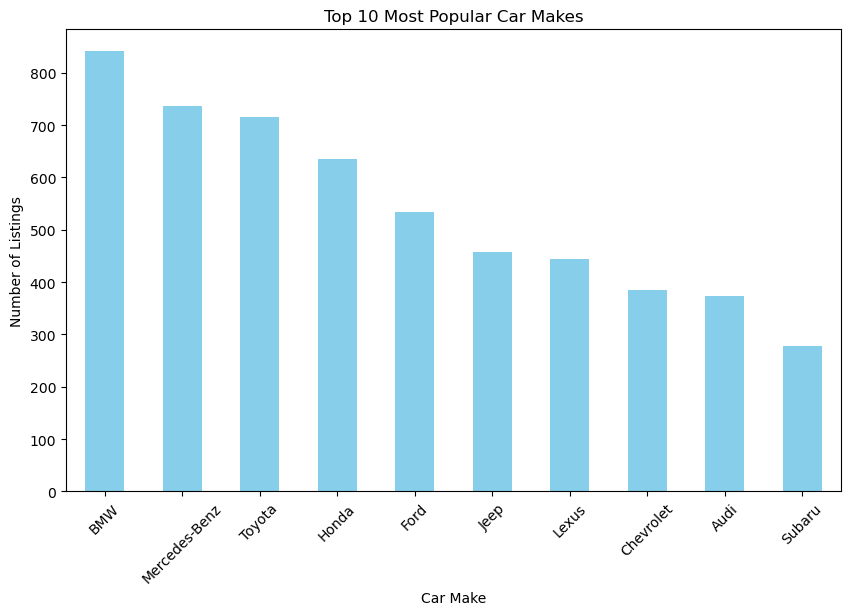

In [32]:
popular_cars.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Most Popular Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [34]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(r'[$,]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])

print(df['Price'].head())

0    39998
1    49985
2    41860
3    28500
4    49000
Name: Price, dtype: int64


In [36]:
df['Used/New'] = df['Used/New'].str.replace('certified', 'Certified', case=False)


In [38]:
df = df[df['Drivetrain'] != '-']

In [40]:
df = df.dropna(subset=['Mileage'])

bins = [0, 20000, 50000, 100000, 150000, float('inf')]
labels = ['0-20k', '20k-50k', '50k-100k', '100k-150k', '150k+']
df['Mileage Bracket'] = pd.cut(df['Mileage'], bins=bins, labels=labels)

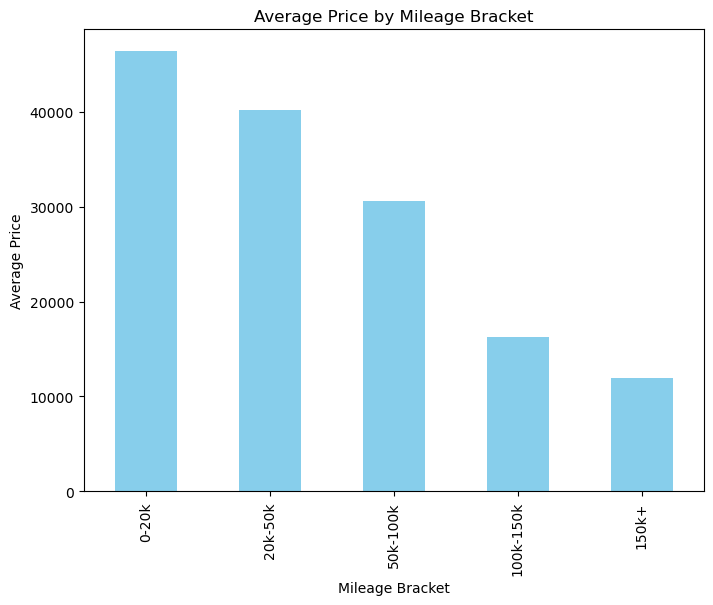

In [42]:
avg_price_by_mileage = df.groupby('Mileage Bracket', observed=True)['Price'].mean()

avg_price_by_mileage.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Price by Mileage Bracket')
plt.xlabel('Mileage Bracket')
plt.ylabel('Average Price')
plt.show()

In [44]:
mileage_summary = df.groupby('Mileage Bracket', observed=True)['Price'].describe()
print(mileage_summary)

                  count          mean           std     min       25%  \
Mileage Bracket                                                         
0-20k            2628.0  46385.815068  25627.762113  8000.0  32994.25   
20k-50k          4154.0  40185.187530  17530.699068  5995.0  29996.25   
50k-100k         1508.0  30648.018568  12006.711112  3999.0  22572.00   
100k-150k         153.0  16259.941176   8063.749276  2300.0   9995.00   
150k+              31.0  11962.774194   6512.650724  3995.0   6245.00   

                     50%       75%       max  
Mileage Bracket                               
0-20k            41000.0  51991.25  449996.0  
20k-50k          36498.0  45987.25  349995.0  
50k-100k         29147.0  37461.00  115998.0  
100k-150k        15295.0  19989.00   42900.0  
150k+             8800.0  16977.50   25000.0  


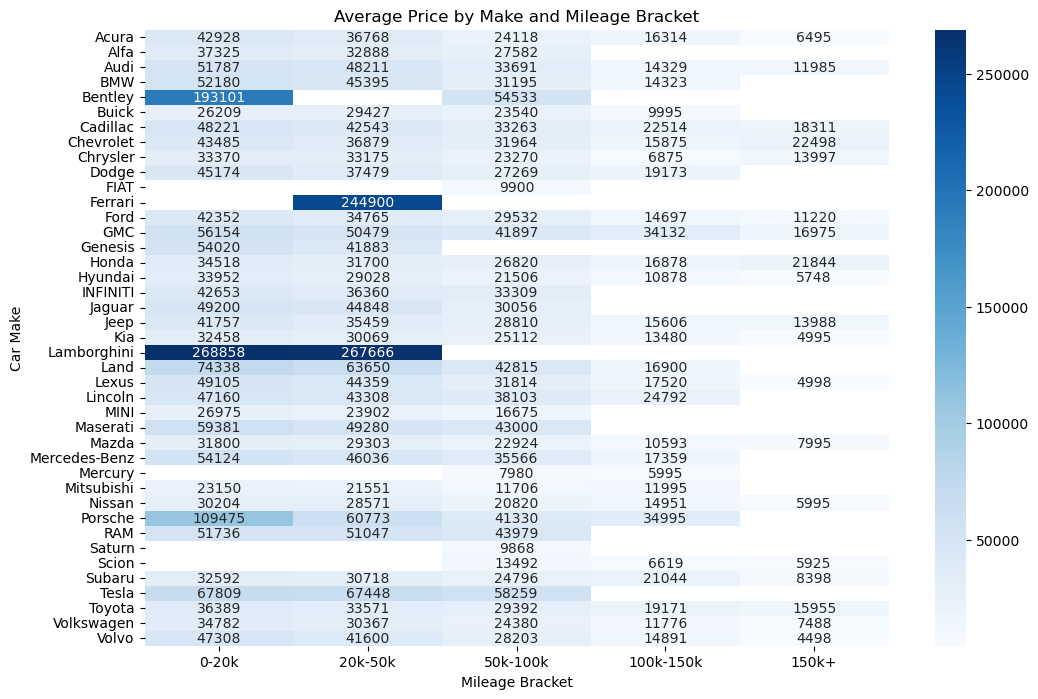

In [46]:
price_by_make_mileage = df.groupby(['Make', 'Mileage Bracket'], observed=True)['Price'].mean().unstack()

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(price_by_make_mileage, cmap='Blues', annot=True, fmt='.0f')
plt.title('Average Price by Make and Mileage Bracket')
plt.xlabel('Mileage Bracket')
plt.ylabel('Car Make')
plt.show()


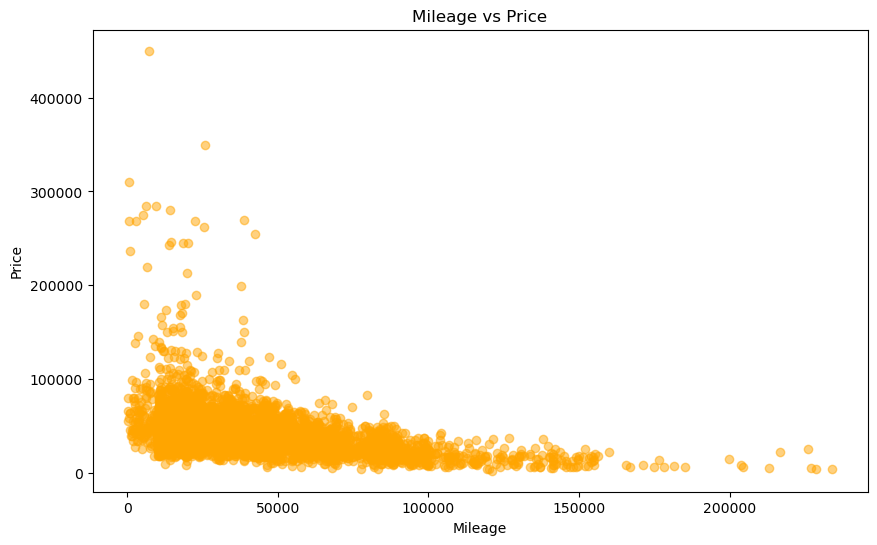

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage'], df['Price'], alpha=0.5, color='orange')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


In [50]:
price_summary = df.groupby('SellerType')['Price'].describe()
price_summary

,count,mean,std,min,25%,50%,75%,max
SellerType,,,,,,,,
Dealer,8434.0,39891.678563,20541.323455,3995.0,28995.00,36213.0,45998.0,449996.0
Private,40.0,36515.075000,23225.065302,2300.0,21998.75,30150.0,47375.0,122222.0


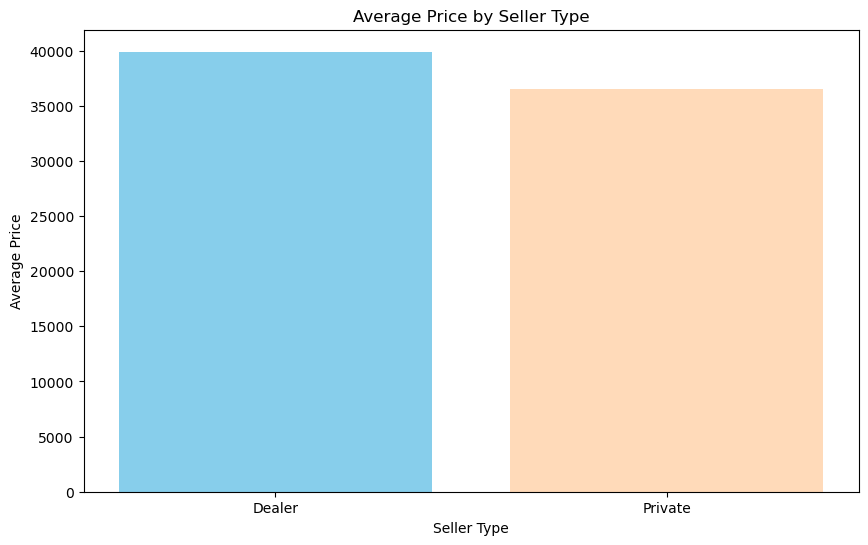

In [52]:
avg_price_by_seller = df.groupby('SellerType')['Price'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_seller['SellerType'], avg_price_by_seller['Price'], color = ['skyblue', 'peachpuff'])
plt.title('Average Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Price')
plt.show()

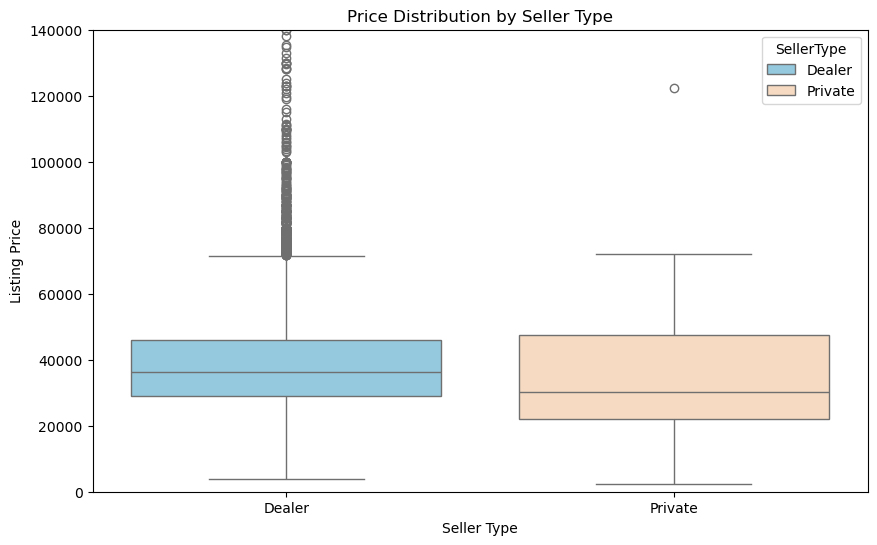

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SellerType', y='Price', data=df, hue='SellerType', palette={'Dealer':'skyblue', 'Private':'peachpuff'}, legend=True)
plt.title('Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Listing Price')
plt.ylim(0,140000)
plt.show()

In [28]:
honda_data = df[df['Make'] == 'Honda']

dealer_honda = honda_data[honda_data['SellerType'] == 'Dealer']
private_honda = honda_data[honda_data['SellerType'] == 'Private']

average_price_honda_dealer = dealer_honda['Price'].mean()
average_price_honda_private = private_honda['Price'].mean()

print(f'Average listing price for Dealers on Honda Cars: {average_price_honda_dealer}')
print(f'Average listing price for Private Dealers on Honda Cars: {average_price_honda_private}')

Average listing price for Dealers on Honda Cars: 31766.699842022117
Average listing price for Private Dealers on Honda Cars: 27816.333333333332


In [30]:
average_mileage_honda_dealer = dealer_honda['Mileage'].mean()
average_mileage_honda_private = private_honda['Mileage'].mean()

print(f'Average mileage for Dealers on Honda Cars: {average_mileage_honda_dealer}')
print(f'Average mileage for Private Dealers on Honda Cars:: {average_mileage_honda_private}')

Average mileage for Dealers on Honda Cars: 33702.39494470774
Average mileage for Private Dealers on Honda Cars:: 46683.333333333336


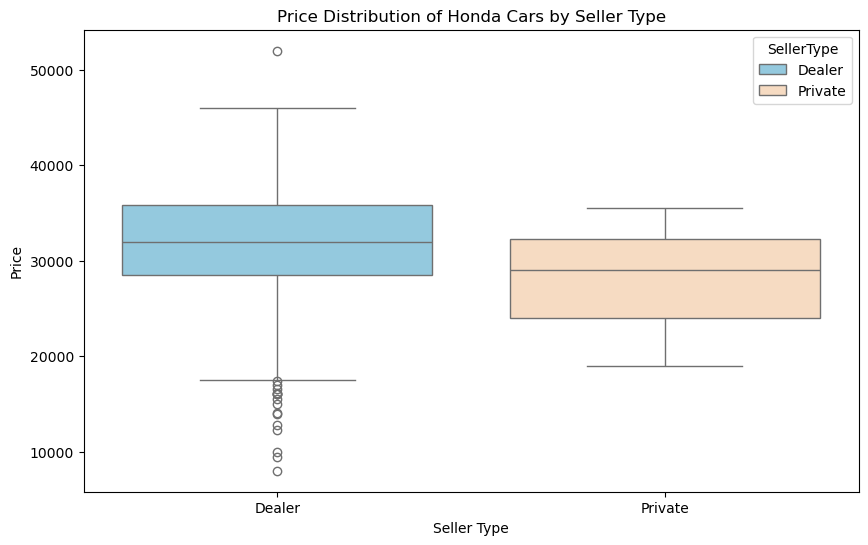

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x ='SellerType', y ='Price', data = honda_data, hue = 'SellerType', palette = {'Dealer':'skyblue', 'Private':'peachpuff'}, legend=True)

plt.title('Price Distribution of Honda Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Price')
plt.show()

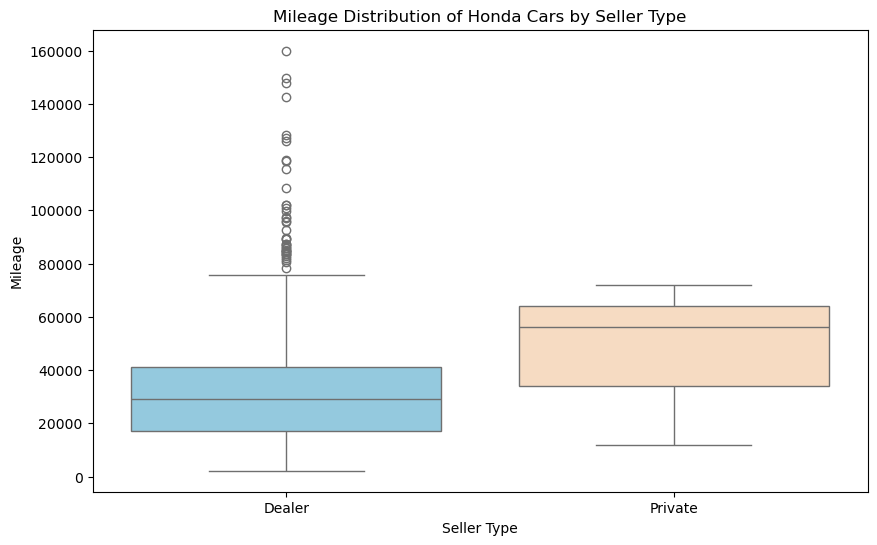

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x ='SellerType', y ='Mileage', data = honda_data, hue = 'SellerType', palette = {'Dealer':'skyblue', 'Private':'peachpuff'})

plt.title('Mileage Distribution of Honda Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Mileage')
plt.show()

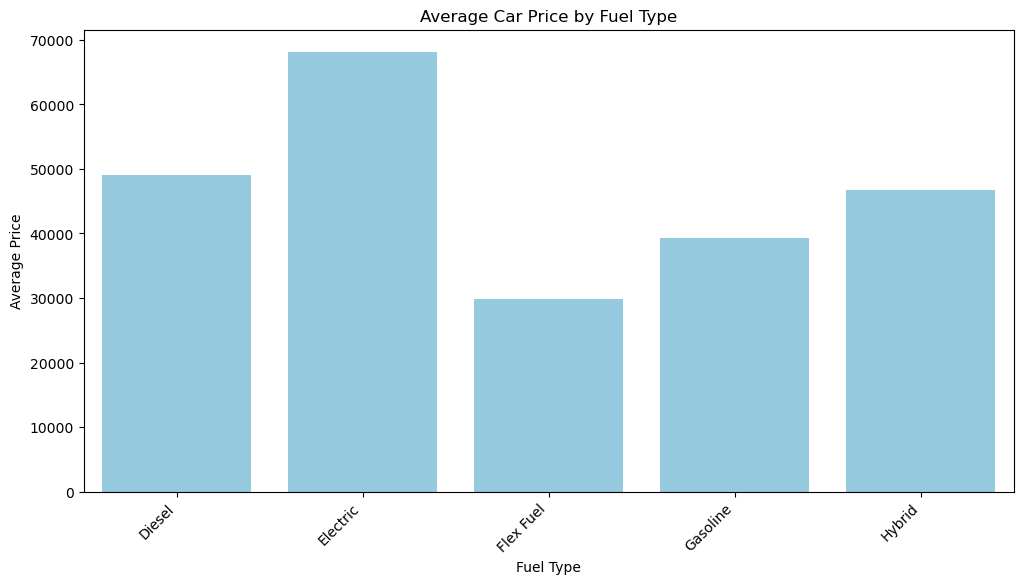

In [61]:
df['FuelType'] = df['FuelType'].replace({
    'Gasoline Fuel': 'Gasoline',
    'Electric Fuel System': 'Electric',
    'Gasoline/Mild Electric Hybrid': 'Gasoline',
    'Flexible Fuel': 'Flex Fuel',
    'Diesel Fuel': 'Diesel',
    'E85 Flex Fuel': 'Flex Fuel',
    'Plug-In Electric/Gas': 'Hybrid',
    '–': None,  
    'Flex Fuel Capability': 'Flex Fuel',
})

fuel_data = df.dropna(subset=['FuelType'])
average_price_fuel = fuel_data.groupby('FuelType')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='FuelType', y='Price', data=average_price_fuel,hue = 'FuelType', palette = {'skyblue'})

plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [71]:
print(average_price_fuel)

    FuelType         Price
0     Diesel  49022.000000
1   Electric  68174.560811
2  Flex Fuel  29912.017241
3   Gasoline  39365.934481
4     Hybrid  46691.125000


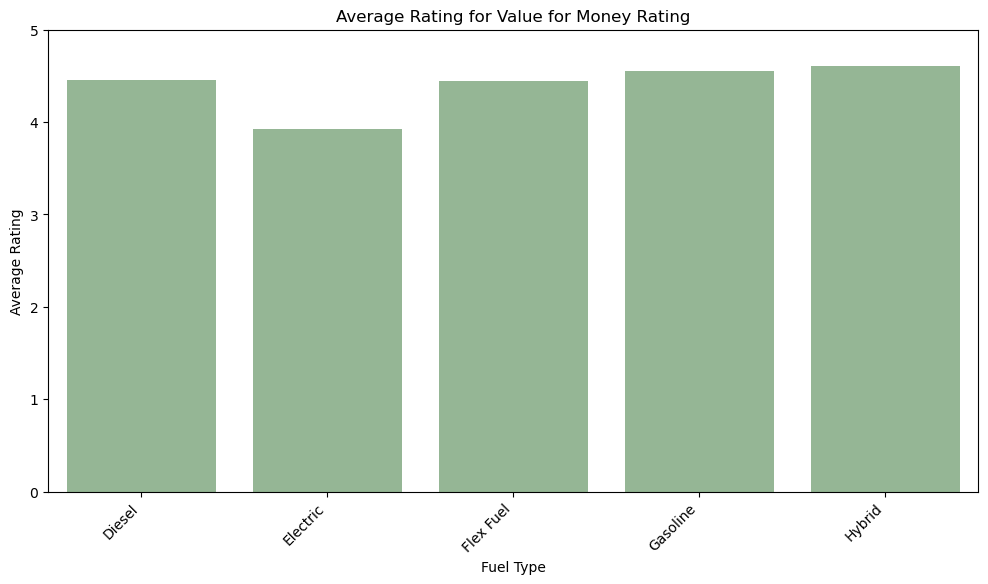

In [73]:
average_value_for_money_fuel = fuel_data.groupby('FuelType')['ValueForMoneyRating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='FuelType', y='ValueForMoneyRating', data=average_value_for_money_fuel, hue = 'FuelType', palette = {'darkseagreen'})

plt.title('Average Rating for Value for Money Rating')
plt.xlabel('Fuel Type')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.xticks(rotation=45, ha='right')
plt.show()

In [75]:
print(average_value_for_money_fuel)

    FuelType  ValueForMoneyRating
0     Diesel             4.453488
1   Electric             3.920946
2  Flex Fuel             4.438793
3   Gasoline             4.554050
4     Hybrid             4.610938
